In [6]:
import json

data = json.load(open('../../data_resources/ned/training/ned_db_training_file_2018_05_21_10_31_41.json'))

In [21]:
candidates = []
X = []
y = []

for i in range(0,len(data)):
    obj = data[i]
    candidates.append(obj[2])
    X.append(obj[4:-1])
    y.append(obj[-1])
    

# 1    
print(candidates[-2])
# 0.8,1,0,1.0,1.0,1,1.0,0.25,1.0,1.0,0.016
print(X[-2])
# 1
print(y[-2])

1
[0.8, 1, 0, 1.0, 1.0, 1, 1.0, 0.25, 1.0, 1.0, 0.016]
1


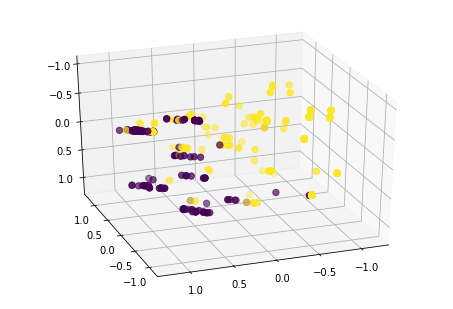

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

X = np.array(X)

clf.fit(X,y)


# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(X)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, s=40)
plt.show()

In [17]:
def plot_learning_curve(clf_name, estimator, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title('Learning curve: {}'.format(clf_name))
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return plt

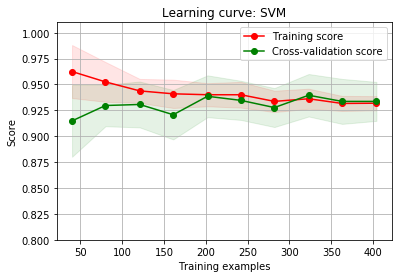

0.910917378917379


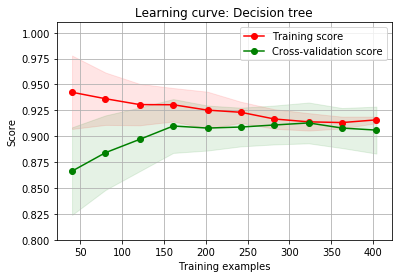

0.902917378917379


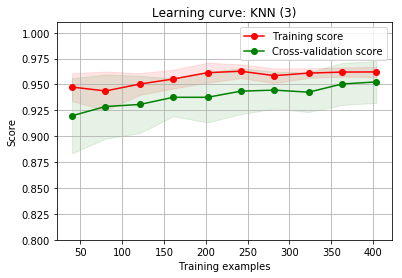

0.9341538461538462


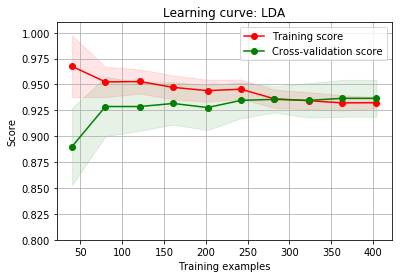

0.9225384615384616


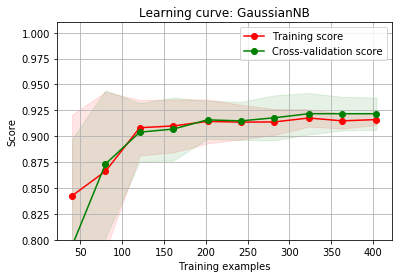

0.9149116809116811


In [18]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron

clfs = [
    svm.SVC(kernel='linear', C=2, probability=True),
    DecisionTreeClassifier(max_depth = 2),
    KNeighborsClassifier(n_neighbors=3),
    LinearDiscriminantAnalysis(solver="svd", store_covariance=True),
    GaussianNB()
]

clf_names = [
    'SVM',
    'Decision tree',
    'KNN (3)',
    'LDA',
    'GaussianNB'
]

for i in range(0,len(clfs)):

    clf = clfs[i]
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    plot_learning_curve(clf_names[i], clf, X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=10)

    clf.fit(X,y)

    scores = cross_val_score(clf, X, y, cv=20)
    print(np.mean(scores))

In [54]:
BIN_SIZE = 10

c_bins = []
X_bins = []
y_bins = []

for i in range(BIN_SIZE,80,BIN_SIZE):
    
    current_c_bin = []
    current_X_bin = []
    current_y_bin = []

    
    for j in range(0,len(X)):
        if candidates[j] < i and candidates[j] > i-BIN_SIZE:
            current_c_bin.append(candidates[j])
            current_X_bin.append(X[j])
            current_y_bin.append(y[j])
    
    
    c_bins.append(current_c_bin)
    X_bins.append(current_X_bin)
    y_bins.append(current_y_bin)
    
for b in c_bins:
    print(b)

[1, 4, 4, 6, 5, 6, 7, 1, 4, 7, 1, 4, 7, 4, 1, 6, 6, 6, 2, 2, 6, 6, 6, 6, 6, 6, 6, 7, 7, 1, 4, 4, 6, 6, 3, 3, 3, 2, 7, 7, 5, 2, 1, 2, 2, 5, 7, 5, 5, 7, 7, 5, 6, 6, 6, 6, 2, 8, 2, 2, 2, 1, 1, 4, 3, 3, 1, 1, 2, 2, 3, 3, 1, 1, 1, 7, 1, 1, 2, 2, 5, 3, 4, 4, 3, 1, 4, 4, 4, 4, 2, 1, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 5, 2, 1, 1, 1, 6, 1, 6, 1, 6, 6, 6, 2, 1, 6, 6, 6, 4, 1, 7, 7, 6, 6, 7, 7, 3, 1, 2, 2, 1, 2, 2, 2, 2, 4, 4, 1, 5, 5, 2, 1, 7, 7, 2, 1, 7, 7, 2, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 1, 7, 7, 6, 6, 4, 4, 5, 5, 1, 3, 4, 1, 1, 2, 1, 1, 8, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 4, 4, 1, 2, 2, 4, 4, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 3, 4, 3, 4, 5, 5, 6, 3, 1, 1, 6, 6, 4, 1, 2, 2, 2, 2, 2, 2, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 5, 3, 3, 2, 2, 2, 1, 1, 2, 2, 2, 5, 5, 7, 7, 7, 7, 2, 1, 1, 1, 1, 4, 1, 1, 3, 3, 3, 6, 6, 7, 1, 6, 1, 7, 7, 2, 1, 3, 3, 1, 1, 5, 1, 1, 1, 2, 1, 2, 2, 7, 7, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 1, 1, 4, 

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train = []
y_train = []

X_test_bins = []
y_test_bins = []

for i in range(0,len(c_bins)):
    current_X_train, current_X_test, current_y_train, current_y_test = train_test_split(X_bins[i], y_bins[i], test_size=0.2, random_state=42)
    
    for x in current_X_train:
        X_train.append(x)
    for y in current_y_train:
        y_train.append(y)
        
    current_X_test_bin = []
    current_y_test_bin = []
    
    for x in current_X_test:
        current_X_test_bin.append(x)
    for y in current_y_test:
        current_y_test_bin.append(y)
        
    X_test_bins.append(current_X_test_bin)
    y_test_bins.append(current_y_test_bin)
        
print(len(X_train))
print(len(X_test))

for i in range(0,len(X_test_bins)):
    y_pred = clf.predict(X_test_bins[i])
    print(accuracy_score(y_test_bins[i], y_pred))

# Bins opsplitten in 80/20

# Classifier trainen op 80 van alle bins.

# Classifier testen op 20 per bin

390
102
0.9310344827586207
1.0
1.0
1.0
1.0
1.0
1.0
